# Comparing MGV and GPD
##### (Metagenomic Gut Virome Database and Gut Phage Database)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
gpd_meta = pd.read_csv('metadata/GPD_metadata.tsv', delimiter='\t')
mgv_meta = pd.read_csv('metadata/mgv_contig_info.tsv', delimiter='\t')

In [42]:
filtered = pd.DataFrame(columns=['qseqid','sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qlen', 'qstart', 'qend', 'slen', 'sstart', 'send', 'evalue', 'bitscore'])
for data in pd.read_csv('../util/blastn.out/GPDxMGV.tsv.tsv', delimiter='\t', chunksize=1000, header=None, names=['qseqid','sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qlen', 'qstart', 'qend', 'slen', 'sstart', 'send', 'evalue', 'bitscore']):
    data['qcov'] = data['length']/data['qlen']
    data['scov'] = data['length']/data['slen']
    data = data[data['pident'] > 90]
    data = data[(data['qcov'] > .9) | (data['scov'] > .9)]
    if not data.empty:
        filtered = pd.concat([filtered, data])
    
filtered

,qseqid,sseqid,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue,bitscore,qcov,scov
2202,ivig_9,MGV-GENOME-0170572,99.770,23060,47,4,51236,15477,38536,23277,224,23277,0.0,42285.0,0.450074,0.990677
2597,ivig_12,MGV-GENOME-0276867,99.998,41476,1,0,41476,1,41476,41601,45,41520,0.0,76587.0,1.000000,0.996995
2606,ivig_12,MGV-GENOME-0267229,99.997,39585,1,0,41476,1,39585,39745,39585,1,0.0,73095.0,0.954407,0.995974
8715,ivig_18,MGV-GENOME-0212399,99.940,26629,6,1,30631,1,26629,28889,2271,28889,0.0,49077.0,0.869348,0.921770
8716,ivig_18,MGV-GENOME-0185905,99.953,25590,4,1,30631,766,26355,25582,25582,1,0.0,47183.0,0.835428,1.000313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287171850,uvig_598885,MGV-GENOME-0208717,90.796,10430,892,54,11062,1,10382,26257,11716,1307,0.0,13880.0,0.942867,0.397227
287171852,uvig_598885,MGV-GENOME-0186775,90.796,10430,892,53,11062,1,10382,25726,14777,25186,0.0,13880.0,0.942867,0.405426
287171853,uvig_598885,MGV-GENOME-0252446,90.796,10430,892,53,11062,1,10382,37148,9798,20207,0.0,13880.0,0.942867,0.280769
287171855,uvig_598885,MGV-GENOME-0191301,90.683,10432,899,56,11062,1,10382,26460,14926,25334,0.0,13812.0,0.943048,0.394255


In [43]:
filtered.to_csv('../../data/MGVxGPDfiltered.csv')

In [59]:
print('Full Statistics:')
print('------------------------')
print(f'Total matches: {len(filtered)}')
unique_matches = len(filtered.groupby(['qseqid', 'sseqid']))
print(f'Total unique matches: {unique_matches}')
print(f"Num unique GPD: {len(np.unique(filtered['qseqid']))}")
print(f"Num unique MGV: {len(np.unique(filtered['sseqid']))}")


both_90 = filtered[(filtered['scov'] > .90) & (filtered['qcov'] > .90)]
print('\n\nBoth above 90 coverage:')
print('----------------------------')
print(f'Total matches: {len(both_90)}')
unique_matches = len(both_90.groupby(['qseqid', 'sseqid']))
print(f'Total unique matches: {unique_matches}')
print(f"Num unique GPD: {len(np.unique(both_90['qseqid']))}")
print(f"Num unique MGV: {len(np.unique(both_90['sseqid']))}")

Full Statistics:
------------------------
Total matches: 354513
Total unique matches: 351342
Num unique GPD: 52869
Num unique MGV: 108833


Both above 90 coverage:
----------------------------
Total matches: 45316
Total unique matches: 45316
Num unique GPD: 26756
Num unique MGV: 38492


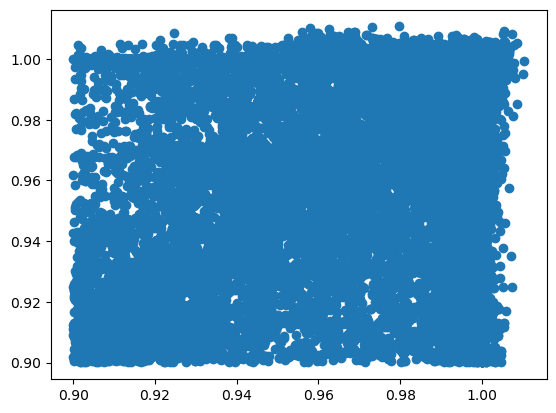

In [61]:
plt.scatter(both_90['scov'], both_90['qcov'])

In [6]:
gpd_meta

,GPD_id,Source,GPD_VC,Size,Predicted_phage_taxon,Host_range_isolates,Host_range_taxon,Metagenomic_runs_detected,Continents_detected,Countries_detected,checkV_MIUViG,checkV_completion,checkV_viral_region,checkV_host_region,checkV_prophage,checkV_termini,Novel
0,ivig_1,Isolate,40836,18045,NaN,GCA_003433665,Proteobacteria/Gammaproteobacteria/Enterobacte...,NaN,NaN,NaN,Genome-fragment,37.25,1-18045,NaN,No,No,Yes
1,ivig_2,Isolate,40837,27391,NaN,GCA_003433665,Proteobacteria/Gammaproteobacteria/Enterobacte...,NaN,NaN,NaN,Genome-fragment,55.71,1-26073,26074-27391,Yes,No,Yes
2,ivig_3,Isolate,17902,19198,Siphoviridae,GCA_003433665,Proteobacteria/Gammaproteobacteria/Enterobacte...,NaN,NaN,NaN,Genome-fragment,23.63,5674-19198,1-5673,Yes,No,Yes
3,ivig_6,Isolate,40829,40928,NaN,GCA_003433685,Firmicutes/Bacilli/Lactobacillales/Streptococc...,NaN,NaN,NaN,High-quality,99.50,1-40928,NaN,No,No,Yes
4,ivig_7,Isolate,40827,43234,Siphoviridae,"GCA_003433685,GCA_003434265",Firmicutes/Bacilli/Lactobacillales/Streptococc...,NaN,NaN,NaN,High-quality,98.57,1-43234,NaN,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142804,uvig_598938,Metagenome,96,41074,NaN,14207_7#1,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,"SRR8180450,SRR8180446","Africa,Africa","Ethiopia,Ethiopia",Genome-fragment,72.78,1-41074,NaN,No,No,No
142805,uvig_598939,Metagenome,16114,39075,NaN,NaN,NaN,SRR8180446,Africa,Ethiopia,High-quality,91.60,1-39075,NaN,No,No,Yes
142806,uvig_598940,Metagenome,21096,34739,Siphoviridae,NaN,NaN,SRR8180446,Africa,Ethiopia,High-quality,95.29,1-34739,NaN,No,No,Yes
142807,uvig_598943,Metagenome,1427,18852,NaN,NaN,NaN,SRR8180446,Africa,Ethiopia,Genome-fragment,44.74,1-18852,NaN,No,No,No


In [24]:
mgv_meta

,contig_id,votu_id,length,checkv_quality,prophage,temperate_score,virulent_score,completeness,gc,stop_codon_readthrough,baltimore,ictv_order,ictv_family,ictv_genus
0,MGV-GENOME-0364295,OTU-61123,97376,Complete,No,0.037500,0.962500,98.26,31.6166,TAG,dsDNA,Caudovirales,crAss-phage,NaN
1,MGV-GENOME-0364296,OTU-61123,97376,Complete,No,0.037500,0.962500,98.26,31.6146,TAG,dsDNA,Caudovirales,crAss-phage,NaN
2,MGV-GENOME-0364303,OTU-05782,97388,Complete,No,0.035740,0.964260,98.28,27.9706,NaN,dsDNA,Caudovirales,crAss-phage,NaN
3,MGV-GENOME-0364311,OTU-01114,97394,Complete,No,0.037500,0.962500,98.38,31.4485,TAG,dsDNA,Caudovirales,crAss-phage,NaN
4,MGV-GENOME-0364312,OTU-23935,97395,Complete,No,0.013875,0.986125,99.25,33.5777,TAG,dsDNA,Caudovirales,crAss-phage,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189675,MGV-GENOME-0231197,OTU-02316,31435,Medium-quality,Yes,0.061757,0.938243,77.67,43.0539,NaN,dsDNA,Caudovirales,Siphoviridae,NaN
189676,MGV-GENOME-0231207,OTU-33946,29879,Medium-quality,Yes,0.025000,0.975000,85.02,60.3267,NaN,dsDNA,Caudovirales,NaN,NaN
189677,MGV-GENOME-0231215,OTU-36811,31248,Medium-quality,Yes,0.237500,0.762500,79.25,64.0553,NaN,dsDNA,Caudovirales,Myoviridae,NaN
189678,MGV-GENOME-0231221,OTU-53827,32374,Medium-quality,Yes,0.987500,0.012500,79.73,40.3873,NaN,dsDNA,Caudovirales,Siphoviridae,NaN
